In [2]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df = pd.read_csv('diabetes.csv')
X = df.drop(['PatientID', 'Diabetic'], axis=1)
y = df['Diabetic']
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.3)



In [25]:
model = MLPClassifier(hidden_layer_sizes=[2000,2000], activation='tanh', max_iter=10000)
model.fit(x_train, y_train)
y_p = model.predict(x_test)
y_a = model.predict(x_train)
print('La precisión del conjunto de prueba es {:.2f} %'.format(100*accuracy_score(y_test, y_p)))
print('La precisión del conjunto de entrenamiento es {:.2f} %'.format(100*accuracy_score(y_train, y_a)))

La precisión del conjunto de prueba es 92.62 %
La precisión del conjunto de entrenamiento es 99.84 %


-------- Matriz de confusión---------


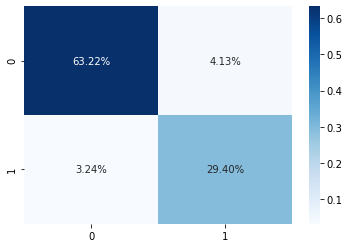

In [26]:
print('-------- Matriz de confusión---------')
sns.heatmap(confusion_matrix(y_test, y_p)/np.sum(confusion_matrix(y_test, y_p)), annot=True, fmt='0.2%',  cmap='Blues')

In [3]:
# Usando otro escalador
df = pd.read_csv('diabetes.csv')
X = df.drop(['PatientID', 'Diabetic'], axis=1)
y = df['Diabetic']
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [8]:
model2 = MLPClassifier(hidden_layer_sizes=[50,15], activation='logistic', max_iter=10000, alpha=0.001)
model2.fit(x_train, y_train)
y_p = model2.predict(x_test)
y_a = model2.predict(x_train)
print('La precisión del conjunto de prueba es {:.2f} %'.format(100*accuracy_score(y_test, y_p)))
print('La precisión del conjunto de entrenamiento es {:.2f} %'.format(100*accuracy_score(y_train, y_a)))

La precisión del conjunto de prueba es 92.50 %
La precisión del conjunto de entrenamiento es 93.49 %


-------- Matriz de confusión---------


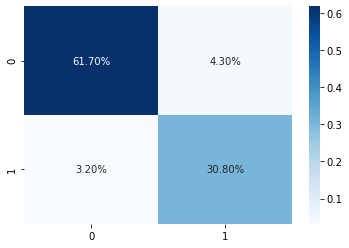

In [9]:
print('-------- Matriz de confusión---------')
sns.heatmap(confusion_matrix(y_test, y_p)/np.sum(confusion_matrix(y_test, y_p)), annot=True, fmt='0.2%',  cmap='Blues')